In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

def readData():
    train_df = pd.read_excel("C:\\Users\\shind\\JupiterWorking\\iNuron\\EDA\\Data Travel\\Data_Train.xlsx")
    #test_df = pd.read_excel("C:\\Users\\shind\\JupiterWorking\\iNuron\\EDA\\Data Travel\\Test_set.xlsx")
    return train_df

train_df = readData()
#df = pd.concat([train_df,test_df])

df = train_df



In [3]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

20

In [2]:

# Problem statement is to predict the airfare
# Size of the Data
# View of the Data
# Datatypes 
# Check Missing Values
# how mathematically look like?
# Check if the duplicate Values
# Correlation between columns
# Graph Analysis(CountPlot,barplot,boxplot)


In [3]:
# Size of the Data
df.shape

(10682, 11)

In [4]:
# View of the Data
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [5]:
# Datatypes 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [6]:
# Check Missing Values

df.isnull().sum()



Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
routeMissingRow = df[df['Route'].isnull() == True].index
routeMissingRow
df.drop(routeMissingRow,inplace=True)


Int64Index([9038], dtype='int64')

In [9]:
# how mathematically look like?

df.describe()

,Price
count,10681.000000
mean,9086.443123
std,4611.075357
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
df.drop_duplicates()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


<AxesSubplot:>

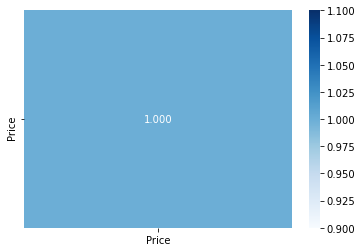

In [11]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")


In [12]:
#counts/Unique

df['Airline'].value_counts()


Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [13]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

In [14]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [15]:
df['Destination'].replace(to_replace="New Delhi",value="Delhi",inplace=True)


In [16]:
df.columns

col1 = ['Airline','Source','Destination','Route','Duration','Additional_Info']

for i in col1:
    print(df[i].value_counts())
    print()
    print()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64


Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64


DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → IXZ → 

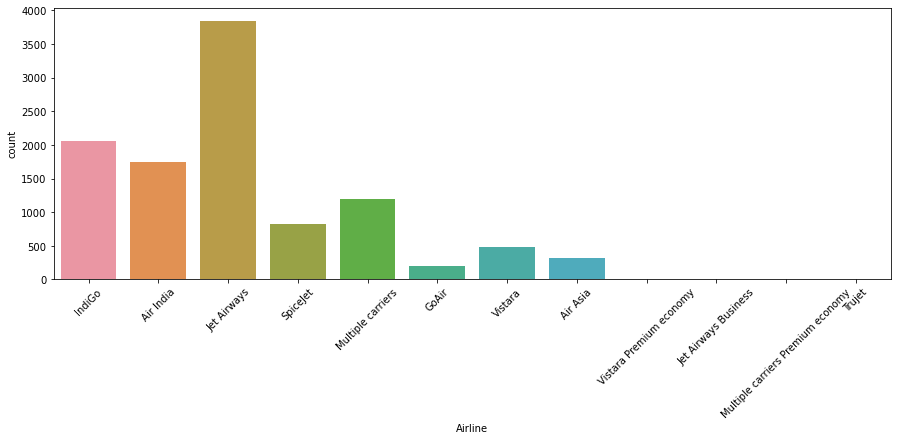

In [17]:

# Graph-Based Analysis
plt.figure(figsize=(15,5))
sns.countplot(x=df['Airline'])
plt.xticks(rotation=45) 
plt.show() 



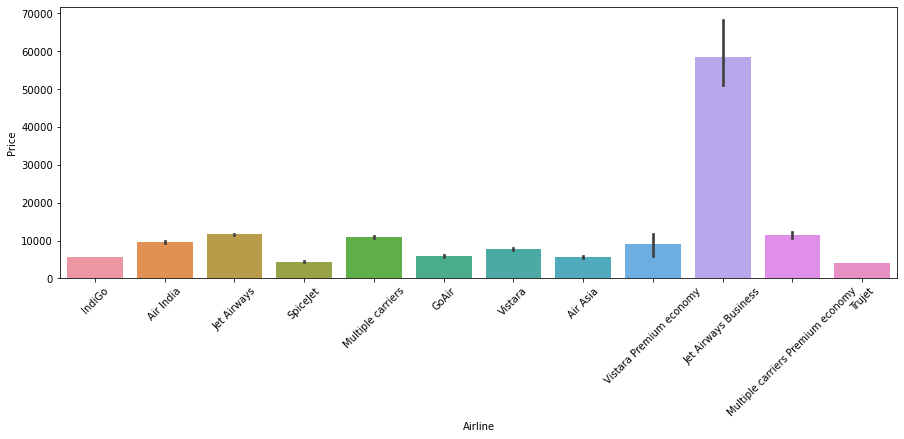

In [18]:

plt.figure(figsize=(15,5))

sns.barplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


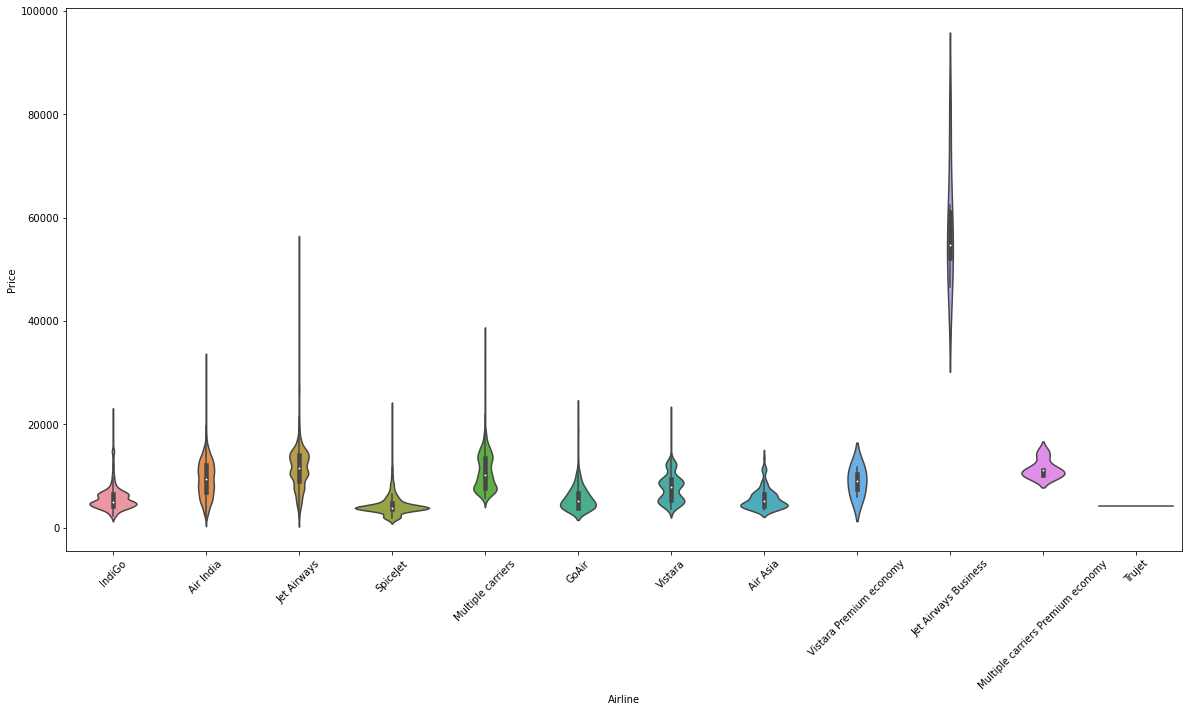

In [19]:

plt.figure(figsize=(20,10))
sns.violinplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


<Figure size 1440x360 with 0 Axes>

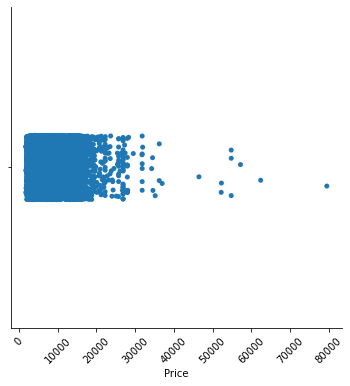

In [20]:
plt.figure(figsize=(20,5))
sns.catplot(data = df, x='Price')
plt.xticks(rotation=45) 
plt.show() 


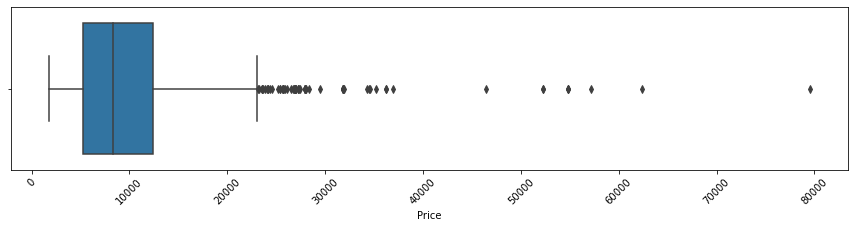

In [21]:
# Outlier Detection
plt.figure(figsize=(15,3))

sns.boxplot(x=df['Price'])
plt.xticks(rotation=45) 
plt.show() 



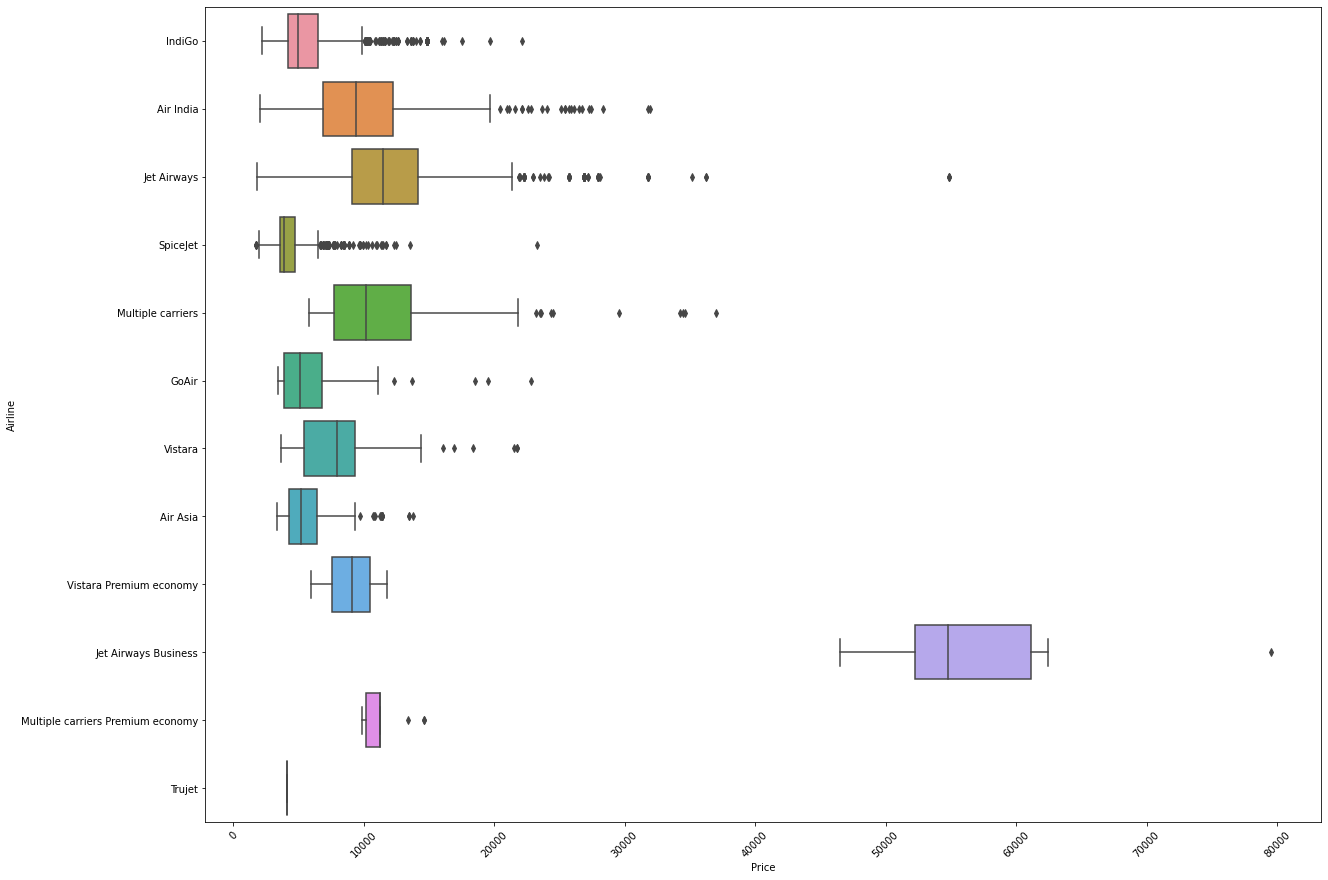

In [22]:
# Outlier Detection

plt.figure(figsize=(20,15))
sns.boxplot(y=df['Airline'],x=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


<AxesSubplot:xlabel='Price', ylabel='Density'>

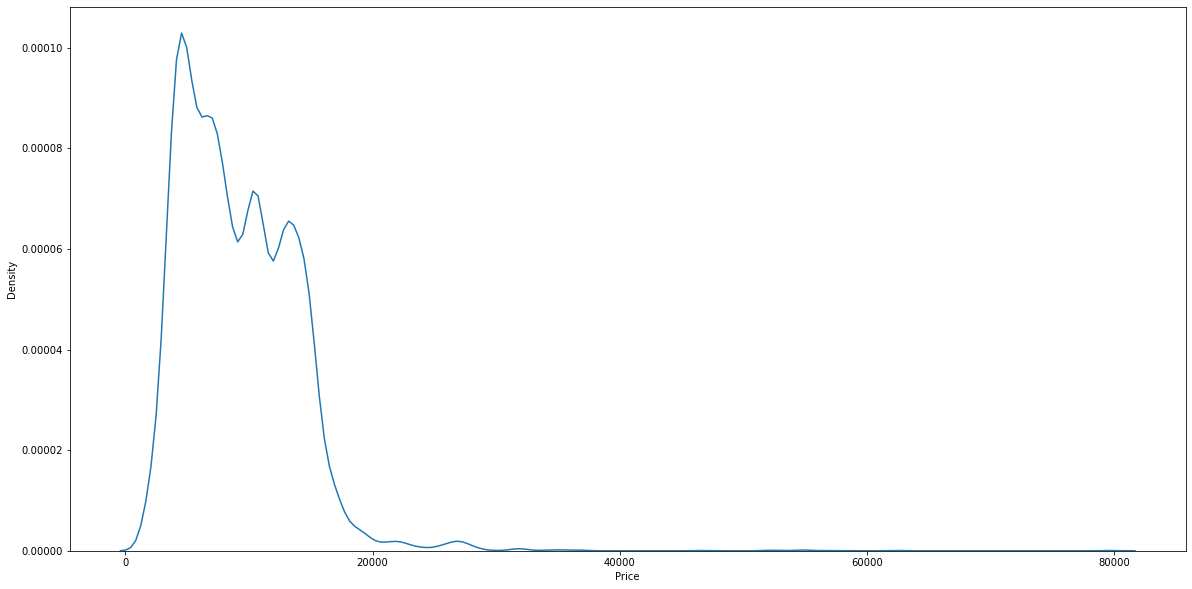

In [23]:

plt.figure(figsize=(20,10))
sns.kdeplot(x=df['Price'])


<AxesSubplot:xlabel='Price', ylabel='Count'>

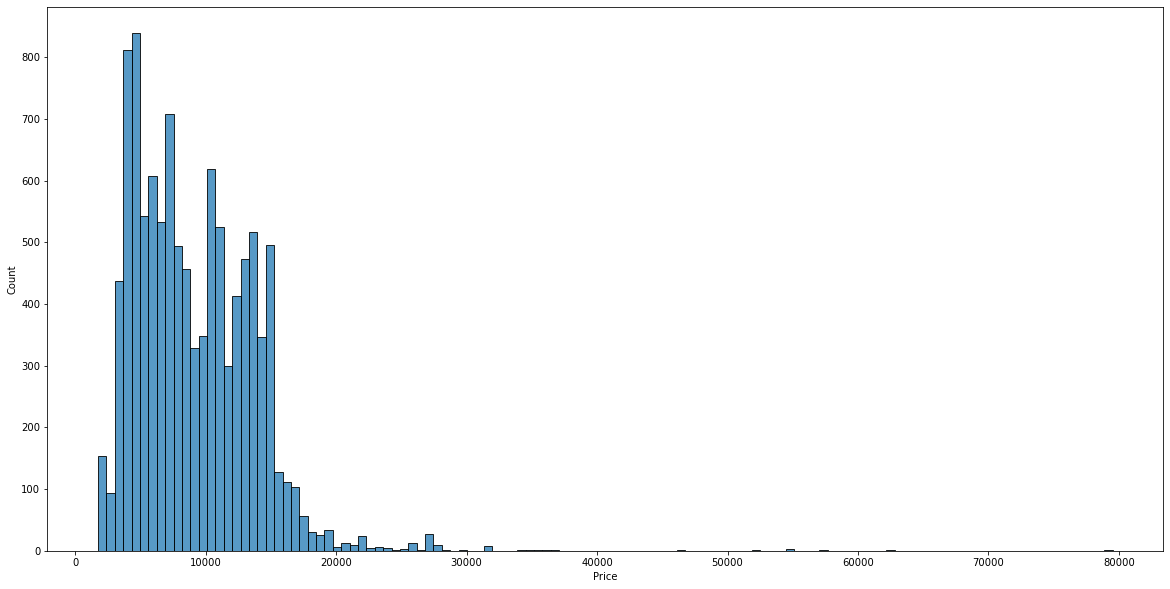

In [24]:
df['Airline']
plt.figure(figsize=(20,10))
sns.histplot(x=df['Price'])

In [25]:
df[df['Airline']=='Air India']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
10,Air India,1/06/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,8907
12,Air India,24/06/2019,Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667
15,Air India,3/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 04 Mar,26h 35m,2 stops,No info,14011
18,Air India,12/06/2019,Delhi,Cochin,DEL → CCU → BOM → COK,20:15,19:15 13 Jun,23h,2 stops,No info,13381
...,...,...,...,...,...,...,...,...,...,...,...
10669,Air India,12/05/2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,23:15,17h 25m,2 stops,No info,11411
10670,Air India,6/06/2019,Mumbai,Hyderabad,BOM → HYD,21:05,22:25,1h 20m,non-stop,No info,3100
10674,Air India,9/06/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145


In [26]:
for i in list(enumerate(df['Airline'].unique())):
    print([i[1]])

['IndiGo']
['Air India']
['Jet Airways']
['SpiceJet']
['Multiple carriers']
['GoAir']
['Vistara']
['Air Asia']
['Vistara Premium economy']
['Jet Airways Business']
['Multiple carriers Premium economy']
['Trujet']


In [27]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [28]:
list(enumerate(df['Airline'].unique()))

[(0, 'IndiGo'),
 (1, 'Air India'),
 (2, 'Jet Airways'),
 (3, 'SpiceJet'),
 (4, 'Multiple carriers'),
 (5, 'GoAir'),
 (6, 'Vistara'),
 (7, 'Air Asia'),
 (8, 'Vistara Premium economy'),
 (9, 'Jet Airways Business'),
 (10, 'Multiple carriers Premium economy'),
 (11, 'Trujet')]

In [29]:
for i in list(enumerate(df['Airline'].unique())):
    print(df['Airline'].unique()[i[0]])
    


IndiGo
Air India
Jet Airways
SpiceJet
Multiple carriers
GoAir
Vistara
Air Asia
Vistara Premium economy
Jet Airways Business
Multiple carriers Premium economy
Trujet


In [30]:
for i in list(enumerate(df['Airline'].unique())):
    print(i[1])


IndiGo
Air India
Jet Airways
SpiceJet
Multiple carriers
GoAir
Vistara
Air Asia
Vistara Premium economy
Jet Airways Business
Multiple carriers Premium economy
Trujet


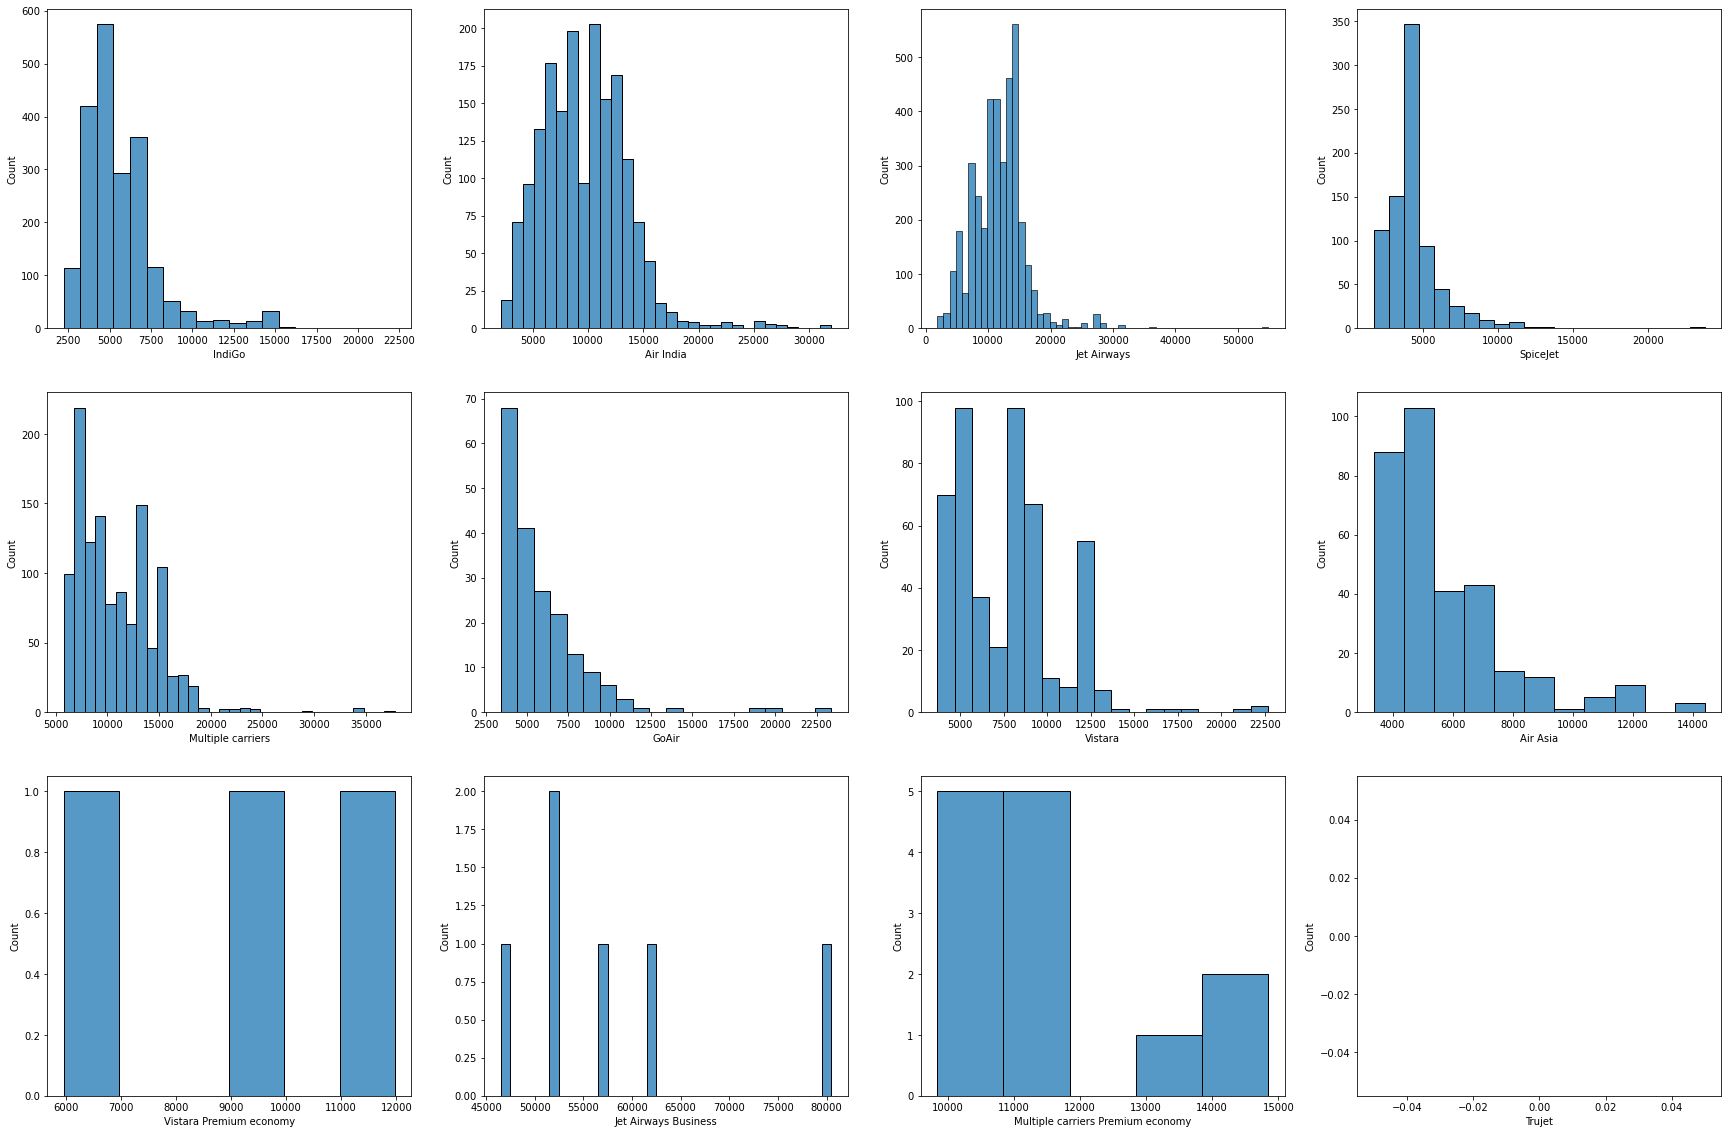

In [31]:
plt.figure(figsize=(30,20))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(3,4,i[0]+1)
    indi = df[df['Airline']==i[1]]
    sns.histplot(x=indi['Price'],binwidth=1000)
    plt.xlabel(i[1]) 


In [32]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

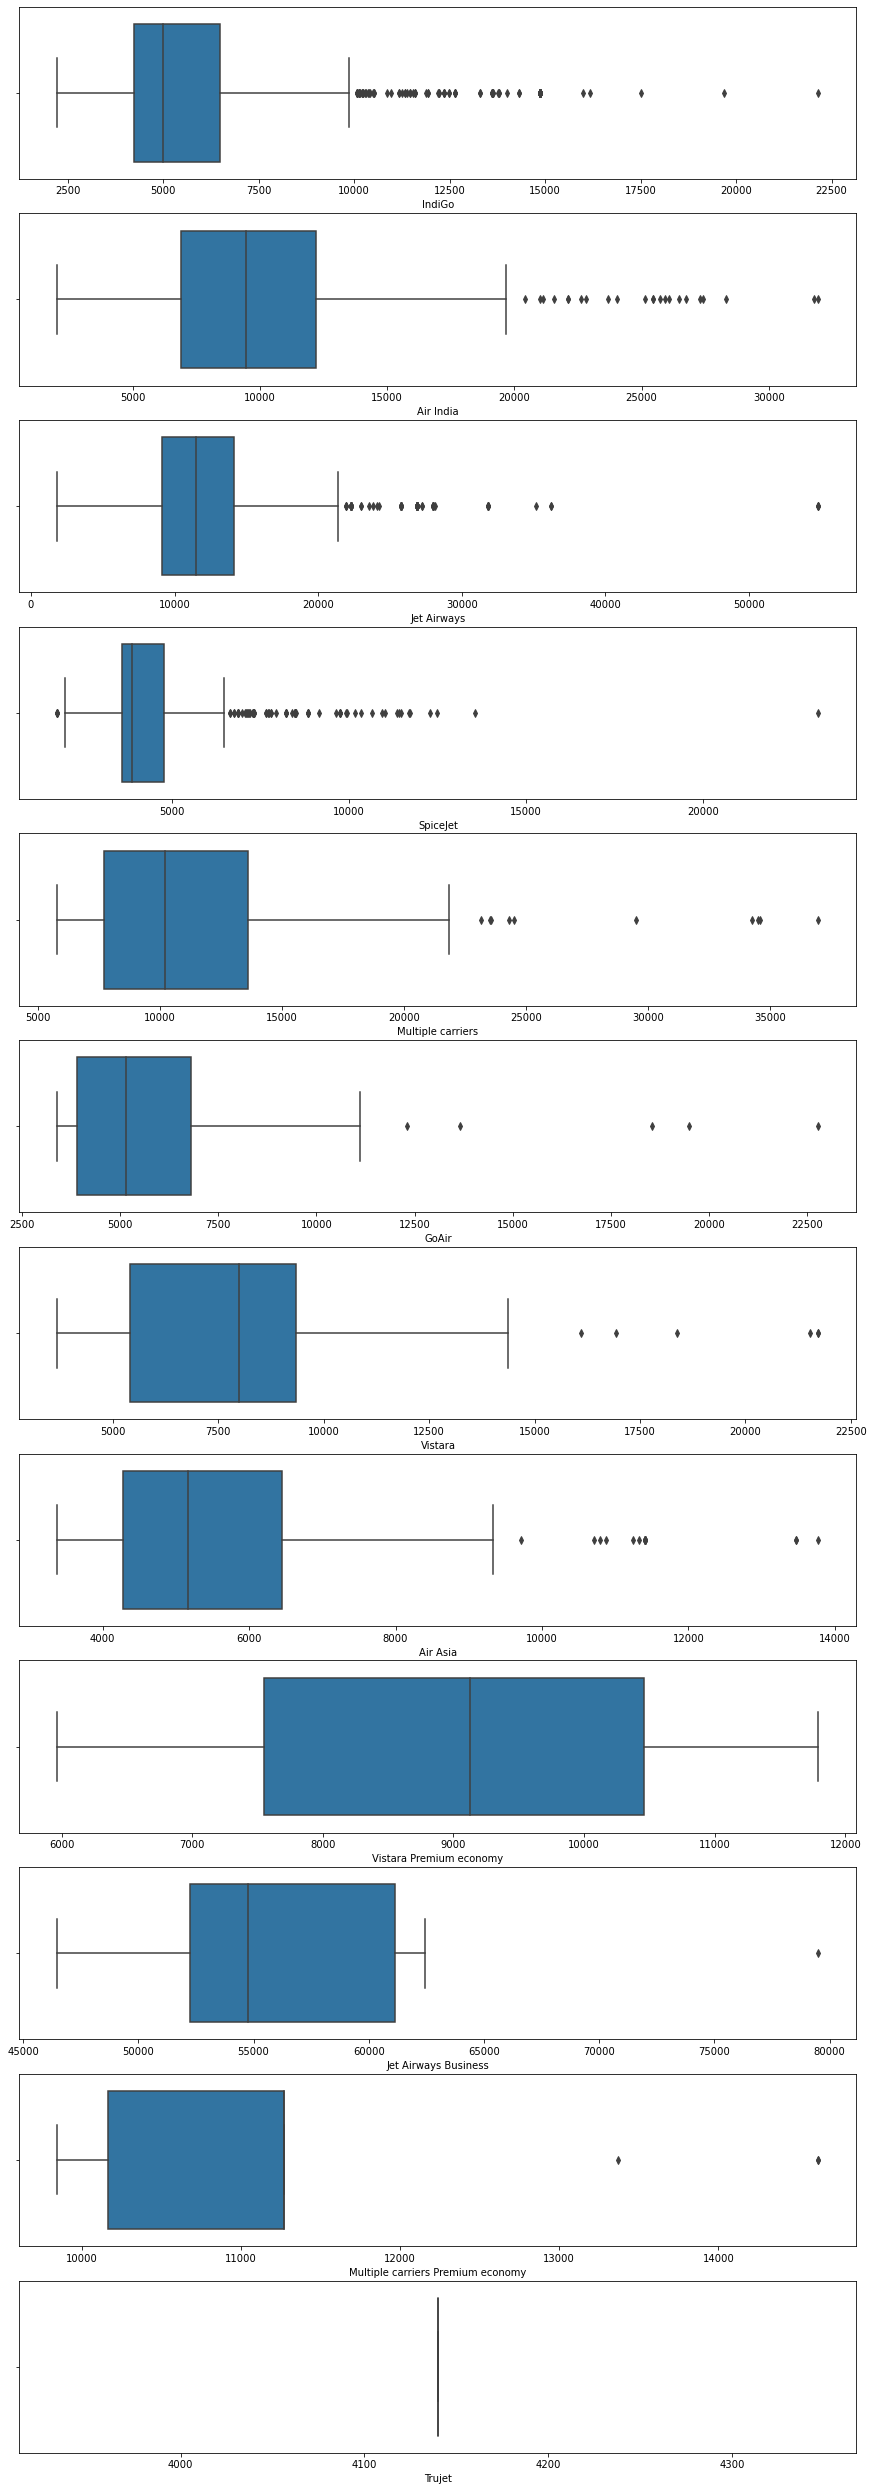

In [33]:
plt.figure(figsize=(15,45))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(12,1,i[0]+1)
    indi = df[df['Airline']==df['Airline'].unique()[i[0]]]
    sns.boxplot(x=indi['Price'])
    plt.xlabel(i[1]) 



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
11,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174
14,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804
22,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943
...,...,...,...,...,...,...,...,...,...,...,...
6470,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,21:00,12h 5m,1 stop,No info,9845
6590,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,15:30,6h 35m,1 stop,No info,11269
9248,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,19:00,01:35 22 Mar,6h 35m,1 stop,No info,10885
9252,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,15:30,8h,1 stop,No info,11269


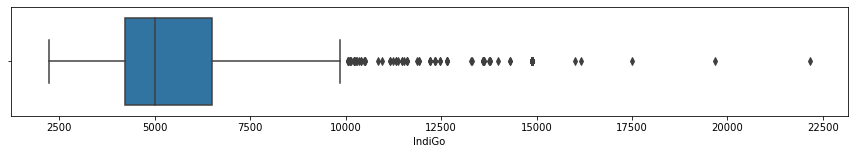

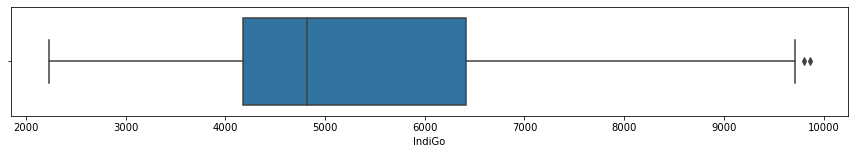

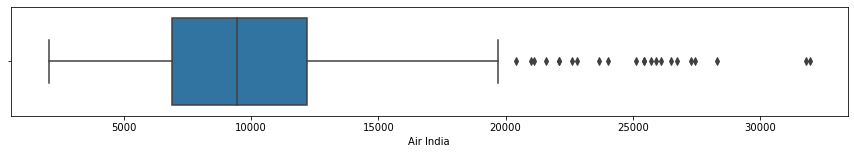

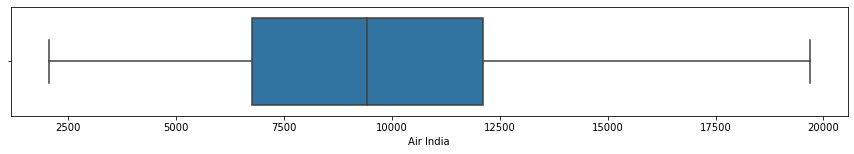

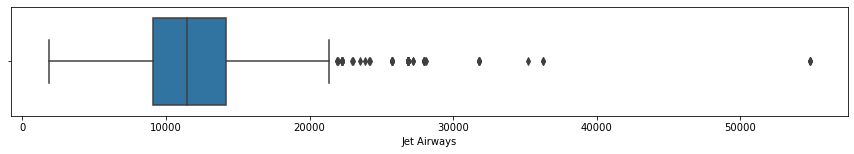

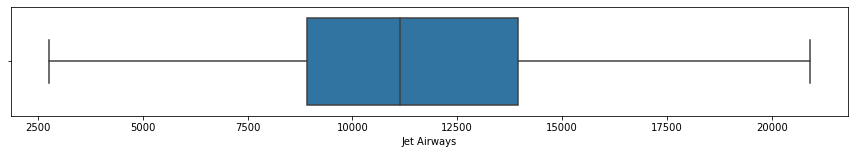

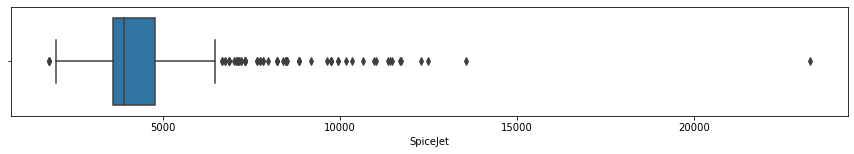

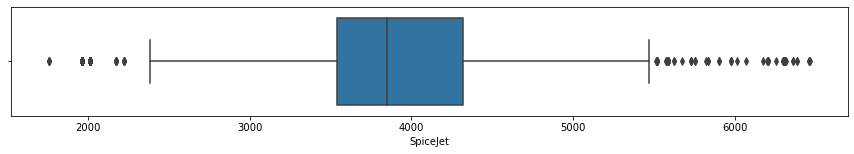

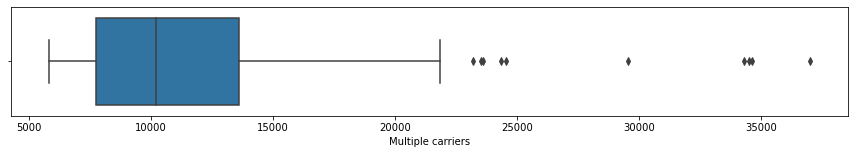

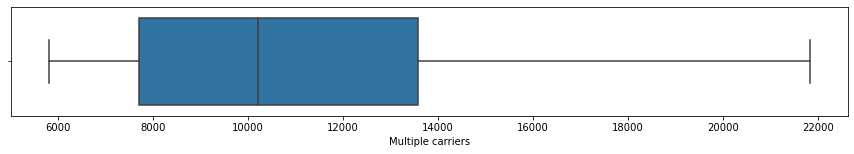

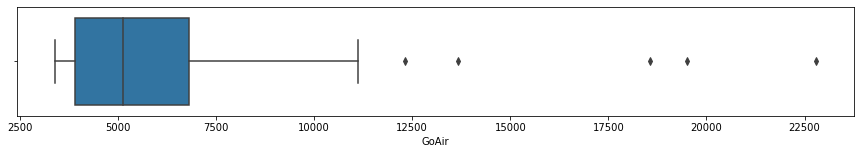

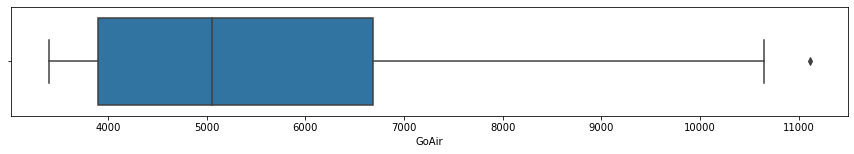

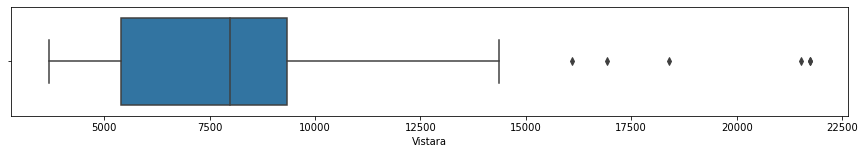

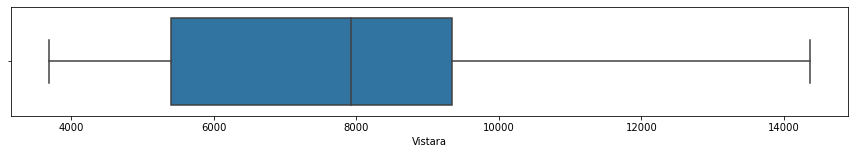

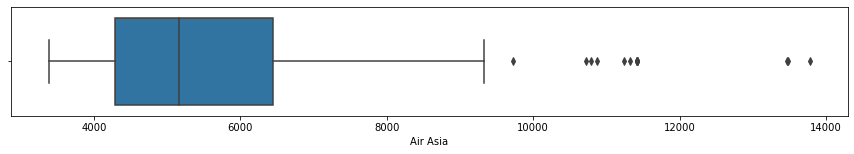

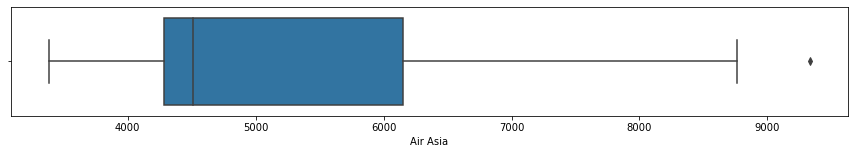

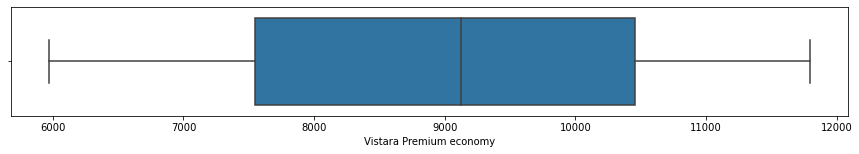

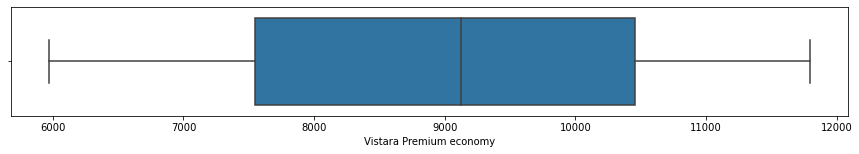

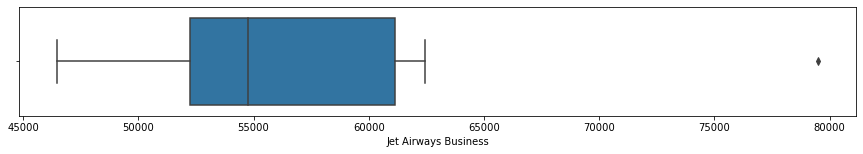

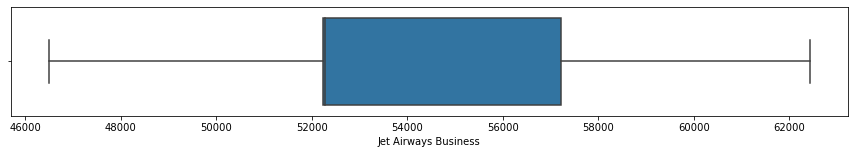

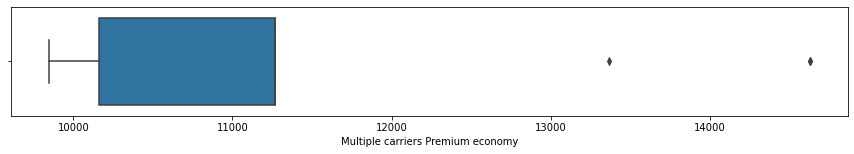

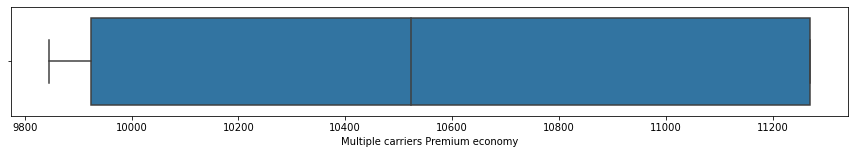

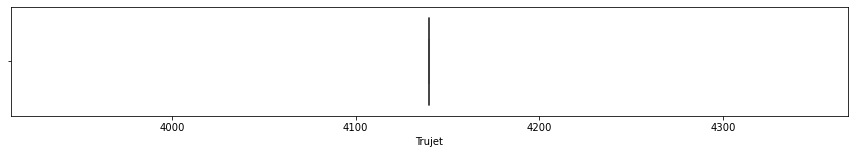

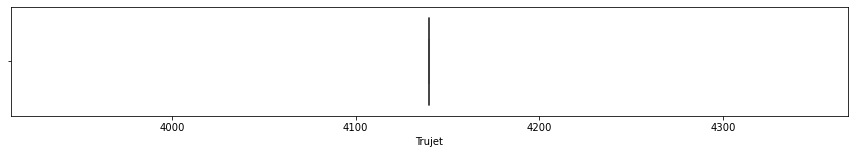

In [34]:
# Remove Outlier


df['Airline'].unique()

airlineName = { 'IndiGo':      [0.25,0.75],
                "Air India":   [0.27,0.75],
                'Jet Airways': [0.27,0.75],
                'SpiceJet':    [0.10,0.60],
                'Multiple carriers':[0.20,0.80],
                'GoAir':       [0.20,0.75],
                'Vistara':     [0.20,0.75],
                'Air Asia':    [0.25,0.75],
                'Vistara Premium economy':[0.25,0.75],
                'Jet Airways Business':[0.25,0.75],
                'Multiple carriers Premium economy':[0.20,0.75],
                'Trujet':       [0,0]

              }


final_df = pd.DataFrame(columns=list(df.columns))
final_df
list(df.columns)

import pandas as pd


for key,value in airlineName.items():
    airDataSet = ""
    airDataSet = df[df['Airline'] == key]
    airDataSet
    plt.figure(figsize=(15,2))
    sns.boxplot(x=airDataSet['Price'])
    plt.xlabel(key)
    q1 = airDataSet['Price'].quantile(value[0])
    q3 = airDataSet['Price'].quantile(value[1])
    IQR = q3-q1
    lowerLimit = q1-IQR*1.5
    upperLimit = q3+IQR*1.5
    lowerLimitIndex = airDataSet[airDataSet['Price']<=lowerLimit].index
    upperLimitIndex = airDataSet[airDataSet['Price']>=upperLimit].index
    if airDataSet.shape[0] > 5 : 
        airDataSet.drop(lowerLimitIndex,axis=0,inplace=True)
        airDataSet.drop(upperLimitIndex,axis=0,inplace=True)
    else:
        pass

    df[df.index.isin([2878])]

    plt.figure(figsize=(15,2))
    sns.boxplot(x=airDataSet['Price'])
    plt.xlabel(key)

    
    #airDataSet1 = airDataSet1.append(airDataSet, ignore_index=True)  # ignore_index=True resets the index

    final_df = pd.concat([final_df, airDataSet], axis=0)  # axis=0 is the default and means appending vertically


    
final_df


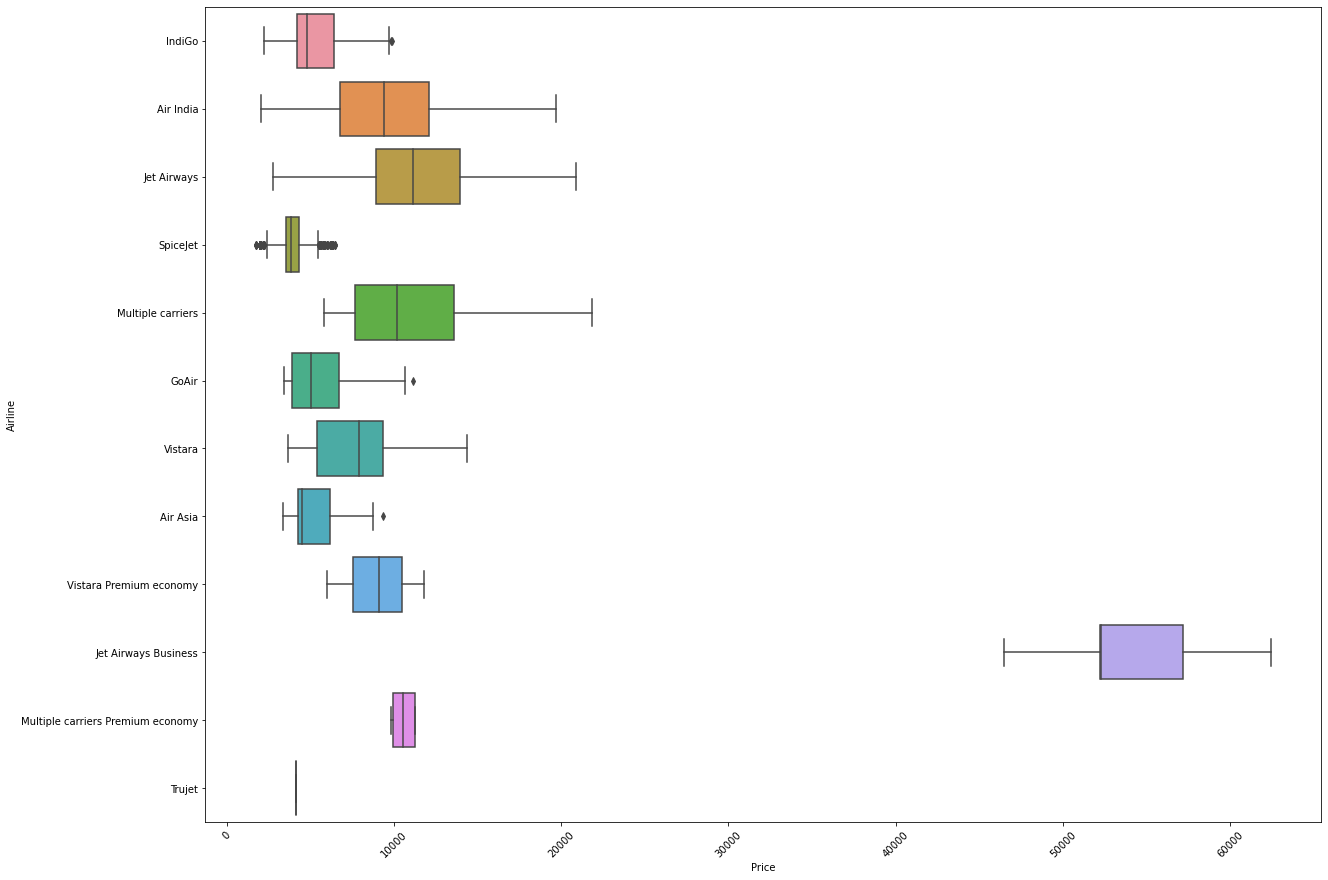

In [35]:
plt.figure(figsize=(20,15))
sns.boxplot(y=final_df['Airline'],x=final_df['Price'])
plt.xticks(rotation=45)
plt.show()


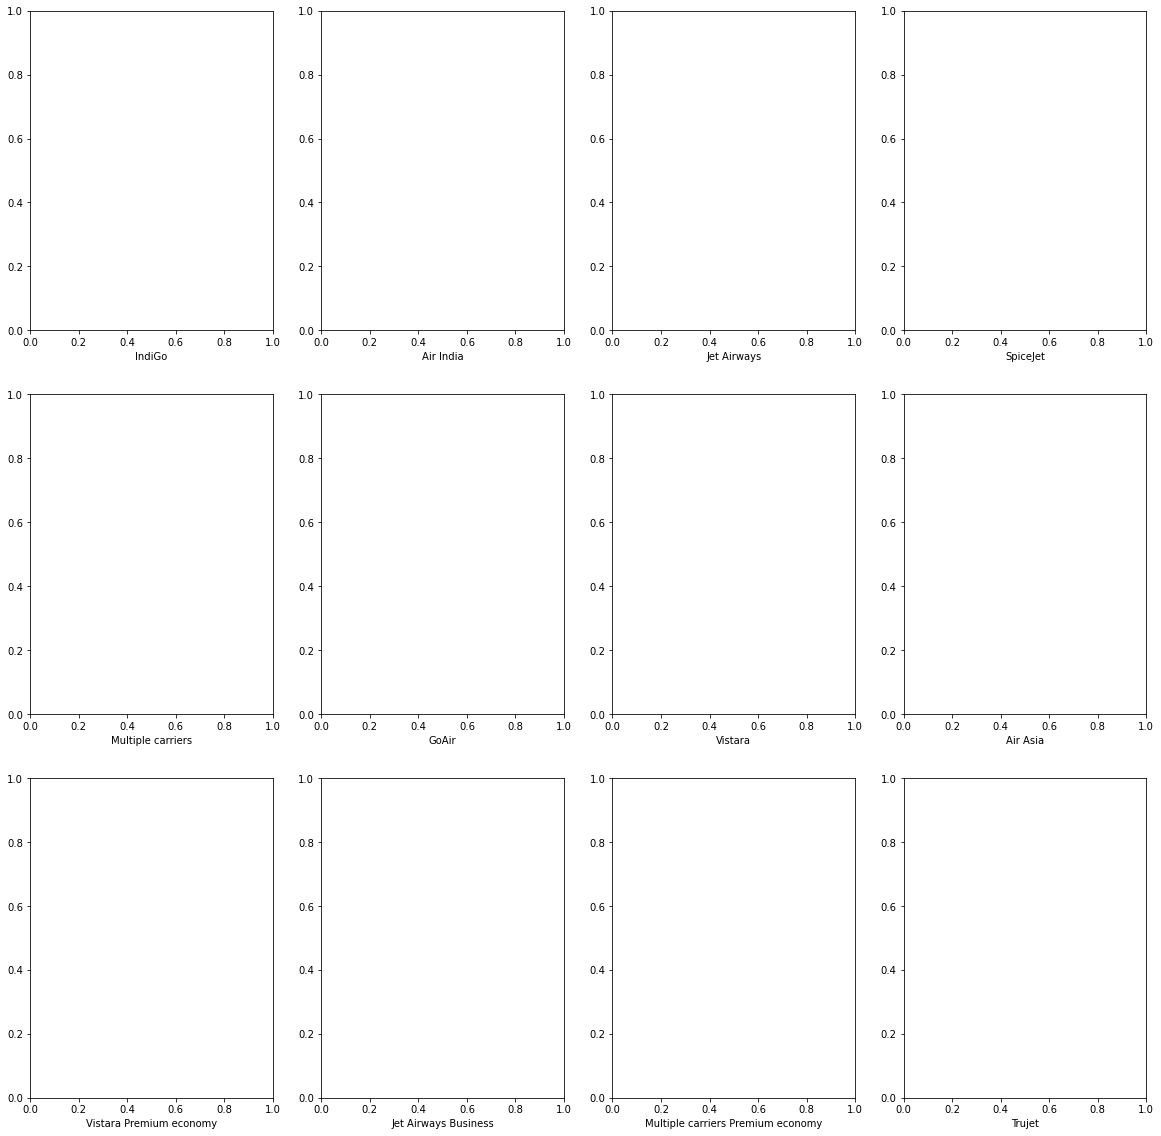

In [36]:
plt.figure(figsize=(20,20))

for i in list(enumerate(final_df['Airline'].unique())):
    plt.subplot(3,4,i[0]+1)
    indi = final_df[final_df['Airline']==i[0]]
    sns.kdeplot(x=indi['Price'])
    plt.xlabel(i[1]) 



In [37]:
df = final_df
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
11,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174
14,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804
22,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943
...,...,...,...,...,...,...,...,...,...,...,...
6470,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,21:00,12h 5m,1 stop,No info,9845
6590,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,15:30,6h 35m,1 stop,No info,11269
9248,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,19:00,01:35 22 Mar,6h 35m,1 stop,No info,10885
9252,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,15:30,8h,1 stop,No info,11269


In [38]:
df['Additional_Info'].value_counts()

No info                         8032
In-flight meal not included     1963
No check-in baggage included     320
1 Long layover                     7
Change airports                    6
No Info                            3
Business class                     2
Name: Additional_Info, dtype: int64

In [39]:
df['Day'] = pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day
df['Month'] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month
df['Year'] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.year
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
11,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174,18,4,2019


In [40]:

columName = 'Dept_Hour'
columName = columName.split("_")[0]
df[columName+"_Hour"] = pd.to_datetime(df['Dep_Time']).dt.hour
df[columName+"_Hour"]

df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18
11,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174,18,4,2019,20
14,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804,24,4,2019,17
22,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943,3,4,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6470,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,21:00,12h 5m,1 stop,No info,9845,21,3,2019,8
6590,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,15:30,6h 35m,1 stop,No info,11269,21,3,2019,8
9248,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,19:00,01:35 22 Mar,6h 35m,1 stop,No info,10885,21,3,2019,19
9252,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,15:30,8h,1 stop,No info,11269,21,3,2019,7


In [41]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

df['Dept_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dept_Minute']=pd.to_datetime(df['Dep_Time']).dt.minute

df['Arr_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arr_Minute']=pd.to_datetime(df['Arrival_Time']).dt.minute

df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
11,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174,18,4,2019,20,20,22,55
14,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804,24,4,2019,17,15,19,50
22,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943,3,4,2019,4,0,6,50


In [42]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time



In [43]:
df['Duration'].unique()

array(['2h 50m', '5h 25m', '2h 35m', '2h 55m', '5h 45m', '10h 25m', '3h',
       '10h 30m', '2h 15m', '5h', '1h 30m', '9h 35m', '2h 25m', '2h 20m',
       '2h 45m', '8h 35m', '4h 50m', '9h 20m', '5h 5m', '4h 55m',
       '6h 20m', '3h 15m', '11h 15m', '14h 5m', '1h 25m', '2h 40m',
       '14h 40m', '8h', '4h 20m', '5h 20m', '7h 5m', '5h 15m', '9h 30m',
       '4h 25m', '13h 55m', '16h 25m', '4h 40m', '4h 35m', '7h 35m',
       '3h 55m', '5h 10m', '4h 45m', '13h 30m', '4h', '7h 15m', '14h 55m',
       '16h 15m', '8h 10m', '6h 55m', '7h', '11h 45m', '10h 35m',
       '1h 35m', '4h 30m', '2h 30m', '8h 45m', '15h 40m', '14h 20m',
       '12h 30m', '6h 10m', '8h 25m', '5h 55m', '11h 5m', '14h 50m',
       '12h 35m', '3h 5m', '14h 45m', '5h 35m', '16h 5m', '13h', '4h 15m',
       '3h 40m', '10h 45m', '8h 50m', '12h 45m', '8h 20m', '5h 40m',
       '11h 50m', '13h 45m', '5h 50m', '5h 30m', '4h 10m', '10h 15m',
       '4h 5m', '6h 15m', '9h 25m', '12h 10m', '8h 5m', '7h 25m',
       '13h 15m',

In [44]:
df['Duration']

0       2h 50m
3       5h 25m
11      2h 35m
14      2h 35m
22      2h 50m
         ...  
6470    12h 5m
6590    6h 35m
9248    6h 35m
9252        8h
2878    3h 15m
Name: Duration, Length: 10333, dtype: object

In [45]:
df["hoursMinutes"] = 0
for i in df.index:
    if " " in df.loc[i,'Duration']:
        column1 = df.loc[i,'Duration'].split(" ")[0]
        column2 = df.loc[i,'Duration'].split(" ")[1]
        
        if "h" in column1:
            column1 =  (int(column1.replace("h",""))*60)
        elif "m" in column1:
            column1 =  (int(column1.replace("m","")))
        
        if "h" in column2:
            column2 =  (int(column2.replace("h",""))*60)
        elif "m" in column2:
            column2 =  (int(column2.replace("m","")))
        
        df.loc[i,'hoursMinutes'] = column1 + column2 

    else:
        column1 = df.loc[i,'Duration']

        if "h" in column1:
            column1 =  (int(column1.replace("h",""))*60)
        elif "m" in column1:
            column1 =  (int(column1.replace("m","")))
        
        df.loc[i,'hoursMinutes'] = column1

        
df



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,170
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,325
11,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174,18,4,2019,20,20,22,55,155
14,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804,24,4,2019,17,15,19,50,155
22,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943,3,4,2019,4,0,6,50,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6470,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,21:00,12h 5m,1 stop,No info,9845,21,3,2019,8,55,21,0,725
6590,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,15:30,6h 35m,1 stop,No info,11269,21,3,2019,8,55,15,30,395
9248,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,19:00,01:35 22 Mar,6h 35m,1 stop,No info,10885,21,3,2019,19,0,1,35,395
9252,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,15:30,8h,1 stop,No info,11269,21,3,2019,7,30,15,30,480


In [46]:
df = df.drop(["Arrival_Time","Arrival_Time","Dep_Time","Date_of_Journey","Route","Duration","Additional_Info"], axis = 1)
df.head(2)



,Airline,Source,Destination,Total_Stops,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,2019,22,20,1,10,170
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,30,325


In [47]:
df['Total_Stops'].unique()

array(['non-stop', '1 stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [48]:
df.columns
data_train = df[['Airline', 'Source', 'Destination', 'Total_Stops', 'Day','Month', 'Year',
                         'Dept_Hour', 'Dept_Minute', 'Arr_Hour', 'Arr_Minute','hoursMinutes','Price',]]

data_train

,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Price
0,IndiGo,Banglore,Delhi,non-stop,24,3,2019,22,20,1,10,170,3897
3,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,18,5,23,30,325,6218
11,IndiGo,Kolkata,Banglore,non-stop,18,4,2019,20,20,22,55,155,4174
14,IndiGo,Kolkata,Banglore,non-stop,24,4,2019,17,15,19,50,155,4804
22,IndiGo,Banglore,Delhi,non-stop,3,4,2019,4,0,6,50,170,3943
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6470,Multiple carriers Premium economy,Delhi,Cochin,1 stop,21,3,2019,8,55,21,0,725,9845
6590,Multiple carriers Premium economy,Delhi,Cochin,1 stop,21,3,2019,8,55,15,30,395,11269
9248,Multiple carriers Premium economy,Delhi,Cochin,1 stop,21,3,2019,19,0,1,35,395,10885
9252,Multiple carriers Premium economy,Delhi,Cochin,1 stop,21,3,2019,7,30,15,30,480,11269


In [49]:
# target Feature
y = data_train['Price']
y.head()



0     3897
3     6218
11    4174
14    4804
22    3943
Name: Price, dtype: object

In [50]:
# independat Feature
X = data_train.drop(['Price'],axis=1)
X


,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
0,IndiGo,Banglore,Delhi,non-stop,24,3,2019,22,20,1,10,170
3,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,18,5,23,30,325
11,IndiGo,Kolkata,Banglore,non-stop,18,4,2019,20,20,22,55,155
14,IndiGo,Kolkata,Banglore,non-stop,24,4,2019,17,15,19,50,155
22,IndiGo,Banglore,Delhi,non-stop,3,4,2019,4,0,6,50,170
...,...,...,...,...,...,...,...,...,...,...,...,...
6470,Multiple carriers Premium economy,Delhi,Cochin,1 stop,21,3,2019,8,55,21,0,725
6590,Multiple carriers Premium economy,Delhi,Cochin,1 stop,21,3,2019,8,55,15,30,395
9248,Multiple carriers Premium economy,Delhi,Cochin,1 stop,21,3,2019,19,0,1,35,395
9252,Multiple carriers Premium economy,Delhi,Cochin,1 stop,21,3,2019,7,30,15,30,480


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train



,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
3381,Jet Airways,Banglore,Delhi,1 stop,18,3,2019,14,5,20,20,375
8544,Jet Airways,Kolkata,Banglore,1 stop,15,5,2019,6,30,16,20,590
7984,Jet Airways,Kolkata,Banglore,1 stop,6,5,2019,20,25,10,55,870
1432,Jet Airways,Banglore,Delhi,non-stop,9,6,2019,18,55,22,0,185
4518,IndiGo,Banglore,Delhi,1 stop,15,3,2019,13,40,18,35,295
...,...,...,...,...,...,...,...,...,...,...,...,...
5892,Jet Airways,Banglore,Delhi,non-stop,1,5,2019,17,45,20,45,180
4295,Jet Airways,Kolkata,Banglore,1 stop,15,5,2019,9,35,18,0,505
4877,Jet Airways,Banglore,Delhi,non-stop,6,6,2019,18,55,22,0,185
4730,IndiGo,Kolkata,Banglore,non-stop,18,4,2019,21,25,0,5,160


In [52]:
X_train['Airline'].unique()

array(['Jet Airways', 'IndiGo', 'Vistara', 'SpiceJet',
       'Multiple carriers', 'Air India', 'Air Asia', 'GoAir',
       'Jet Airways Business', 'Multiple carriers Premium economy',
       'Vistara Premium economy'], dtype=object)

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler

def methodPreprocessing():
    trf1 = ColumnTransformer([
        ('OneHot',OneHotEncoder(drop='first',handle_unknown='ignore'),[0,1,2])],remainder='passthrough')
    
    trf2 = ColumnTransformer([
        ('Ordinal',OrdinalEncoder(categories=[['non-stop', '1 stop', '2 stops', '3 stops', '4 stops']]),[18])]
         ,remainder='passthrough')

    trf3 = ColumnTransformer([
        ('scale', StandardScaler(), slice(0, 25))
    ])

    
    pipe = make_pipeline(trf1,trf2,trf3)
    return pipe



pipe = methodPreprocessing()


X_train = pipe.fit_transform(X_train)
pd.DataFrame(X_train.T)


,0,1,2,3,4,5,6,7,8,9,...,8256,8257,8258,8259,8260,8261,8262,8263,8264,8265
0,0.253690,0.253690,0.253690,-1.211719,0.253690,0.253690,0.253690,-1.211719,-1.211719,0.253690,...,0.253690,1.719098,0.253690,0.253690,0.253690,-1.211719,0.253690,-1.211719,-1.211719,-1.211719
1,-0.451168,-0.451168,-0.451168,-0.451168,-0.451168,-0.451168,-0.451168,-0.451168,-0.451168,-0.451168,...,-0.451168,-0.451168,-0.451168,-0.451168,-0.451168,-0.451168,-0.451168,-0.451168,-0.451168,-0.451168
2,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,...,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783
3,-0.479264,-0.479264,-0.479264,-0.479264,2.086535,-0.479264,2.086535,-0.479264,-0.479264,-0.479264,...,-0.479264,-0.479264,-0.479264,2.086535,-0.479264,-0.479264,-0.479264,-0.479264,2.086535,-0.479264
4,1.325237,1.325237,1.325237,1.325237,-0.754582,-0.754582,-0.754582,-0.754582,-0.754582,1.325237,...,-0.754582,1.325237,1.325237,-0.754582,1.325237,1.325237,1.325237,1.325237,-0.754582,1.325237
5,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,...,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602
6,-0.357989,-0.357989,-0.357989,-0.357989,-0.357989,-0.357989,-0.357989,-0.357989,-0.357989,-0.357989,...,2.793382,-0.357989,-0.357989,-0.357989,-0.357989,-0.357989,-0.357989,-0.357989,-0.357989,-0.357989
7,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,...,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113
8,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512,3.577662,3.577662,-0.279512,...,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512
9,-0.220421,-0.220421,-0.220421,-0.220421,-0.220421,4.536766,-0.220421,-0.220421,-0.220421,-0.220421,...,-0.220421,-0.220421,-0.220421,-0.220421,-0.220421,-0.220421,-0.220421,-0.220421,-0.220421,-0.220421


In [54]:
X_test = pipe.transform(X_test)
print()
pd.DataFrame(X_test).T


,0,1,2,3,4,5,6,7,8,9,...,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066
0,-1.211719,0.253690,-1.211719,-1.211719,0.253690,0.253690,0.253690,-1.211719,0.253690,-1.211719,...,0.253690,1.719098,0.253690,0.253690,-1.211719,-1.211719,0.253690,0.253690,-1.211719,0.253690
1,-0.451168,-0.451168,-0.451168,-0.451168,-0.451168,-0.451168,-0.451168,-0.451168,-0.451168,-0.451168,...,-0.451168,-0.451168,-0.451168,-0.451168,-0.451168,2.216468,2.216468,-0.451168,-0.451168,-0.451168
2,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,...,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783,-0.137783
3,-0.479264,-0.479264,2.086535,-0.479264,2.086535,-0.479264,2.086535,2.086535,-0.479264,-0.479264,...,-0.479264,-0.479264,-0.479264,2.086535,2.086535,-0.479264,-0.479264,-0.479264,-0.479264,-0.479264
4,-0.754582,-0.754582,-0.754582,1.325237,-0.754582,-0.754582,-0.754582,-0.754582,-0.754582,1.325237,...,1.325237,1.325237,1.325237,-0.754582,-0.754582,-0.754582,-0.754582,-0.754582,1.325237,1.325237
5,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,...,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602,-0.024602
6,-0.357989,2.793382,-0.357989,-0.357989,-0.357989,2.793382,-0.357989,-0.357989,2.793382,-0.357989,...,-0.357989,-0.357989,-0.357989,-0.357989,-0.357989,-0.357989,-0.357989,2.793382,-0.357989,-0.357989
7,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,...,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113,-0.029113
8,3.577662,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512,...,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512,-0.279512
9,-0.220421,-0.220421,-0.220421,-0.220421,-0.220421,-0.220421,-0.220421,-0.220421,-0.220421,-0.220421,...,-0.220421,-0.220421,-0.220421,-0.220421,-0.220421,-0.220421,-0.220421,-0.220421,-0.220421,-0.220421


In [55]:
from sklearn.ensemble import RandomForestRegressor

modelRamdom = RandomForestRegressor()
modelRamdom.fit(X_train,y_train)


RandomForestRegressor()

In [56]:
X_train.shape

(8266, 25)

In [57]:
y_pred = modelRamdom.predict(X_test)
y_pred

array([ 3894.015     ,  8169.982     ,  4823.        , ...,
       11175.67      ,  8327.12416667, 11908.82      ])

Text(0, 0.5, 'Test Predicted Data')

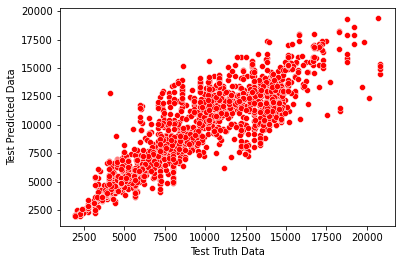

In [58]:

scatter_color = 'red'
sns.scatterplot(y_test,y_pred,color=scatter_color)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")


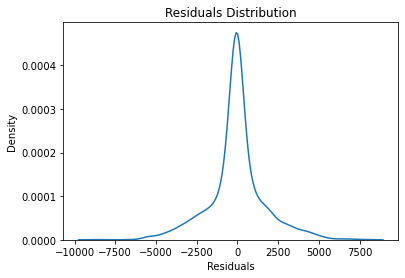

In [59]:
# Calculate residuals
residuals = y_test - y_pred
residuals = residuals.astype(float)
# Create a kernel density plot (KDE) for the residuals
sns.kdeplot(residuals)

# You can also add labels and a title to the plot for better understanding
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Residuals Distribution")

# Display the plot
plt.show()


<AxesSubplot:ylabel='Price'>

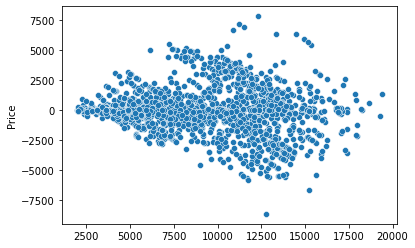

In [60]:
sns.scatterplot(y_pred,residuals)

In [61]:
'''Preformance Metrix'''
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MSE: 2963887.071556024
MAE: 1112.7952942914876
RMSE: 1721.594340010452


In [62]:
## R Square and Adjusted R Square
from sklearn.metrics import r2_score
r2 = metrics.r2_score(y_test,y_pred)
score = r2
## Adjusted R square
#display adjusted R-squared

aR2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('r2  : ',r2)

print('aR2 : ', aR2)

r2  :  0.8120069097455158
aR2 :  0.8097042016336284




Lasso()



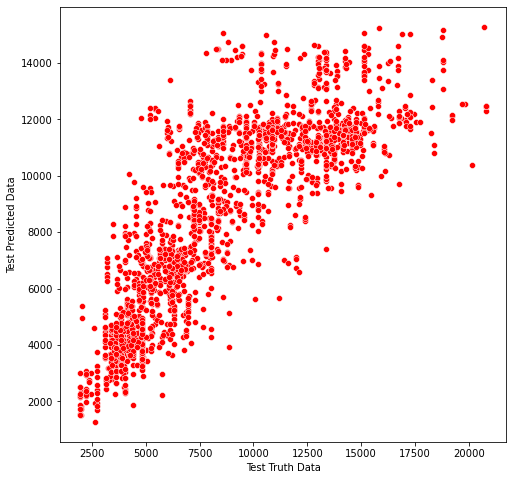

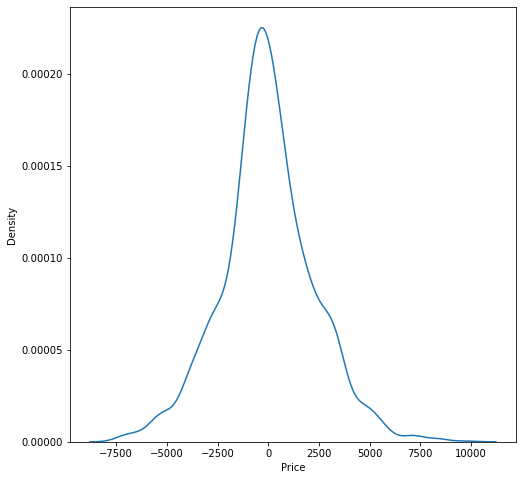

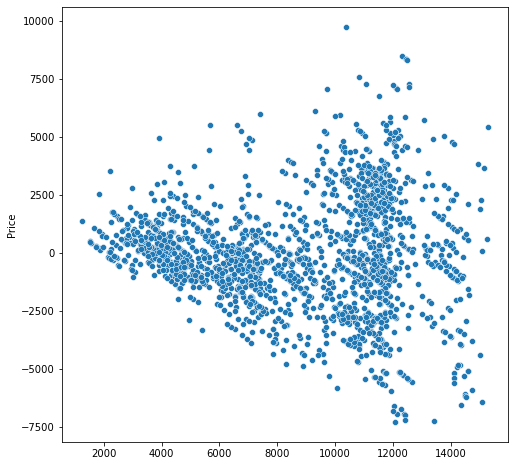

MSE: 5219196.019972098
MAE: 1714.3923784126205
RMSE: 2284.55597873462
r2  :  0.6689574316597193
aR2 :  0.8097042016336284


Ridge()



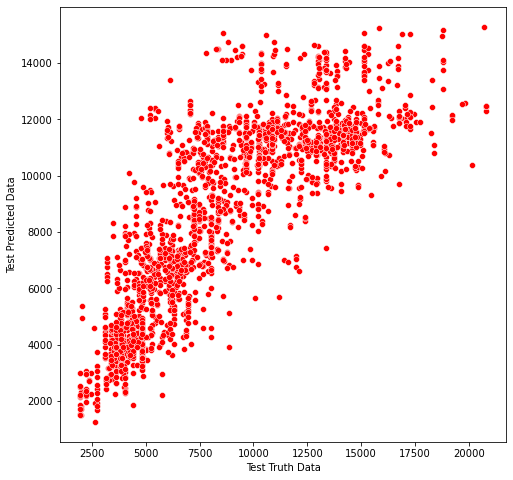

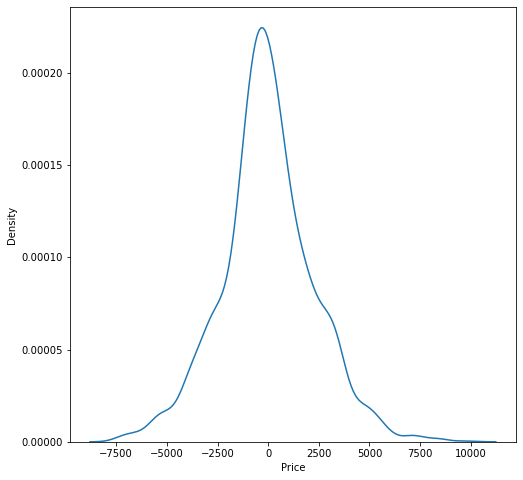

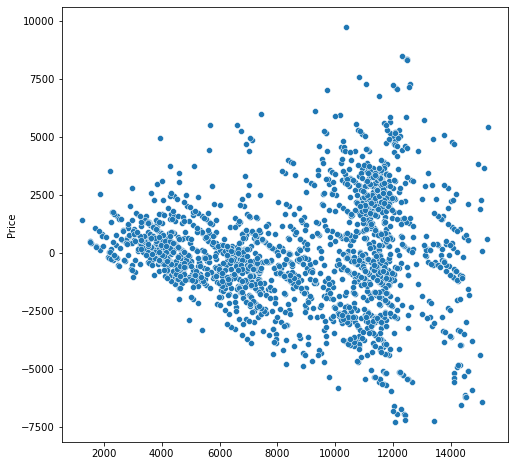

MSE: 5218862.806287208
MAE: 1714.667779852251
RMSE: 2284.4830501203564
r2  :  0.6689785666992216
aR2 :  0.8097042016336284


RandomForestRegressor()



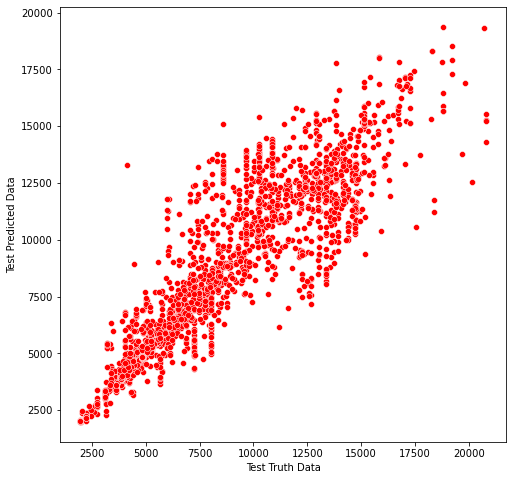

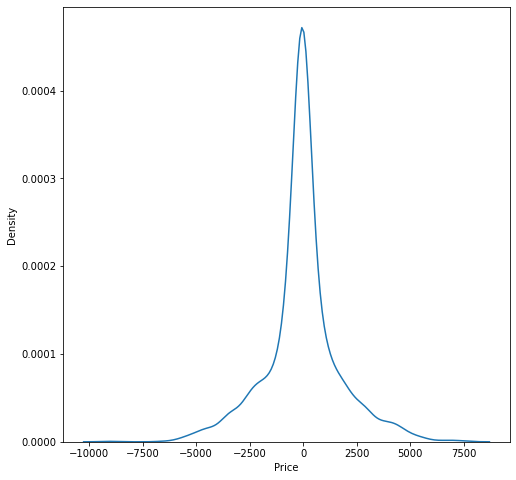

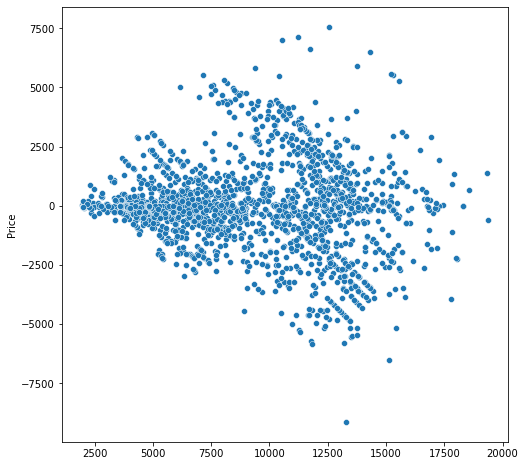

MSE: 2980656.834051009
MAE: 1115.8581121865557
RMSE: 1726.4578865558838
r2  :  0.8109432391676044
aR2 :  0.8097042016336284


LinearRegression()



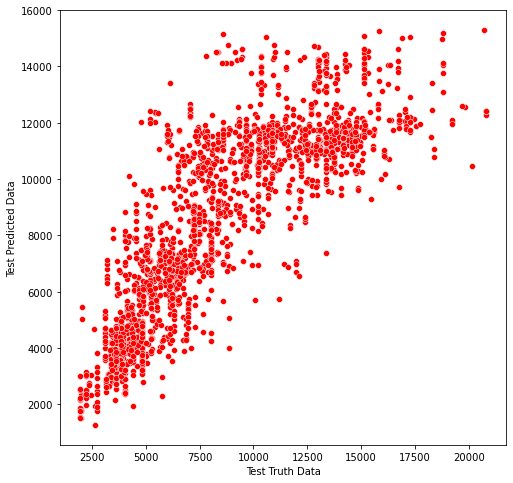

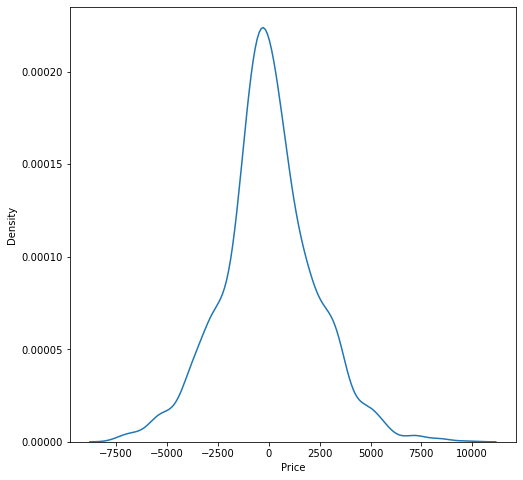

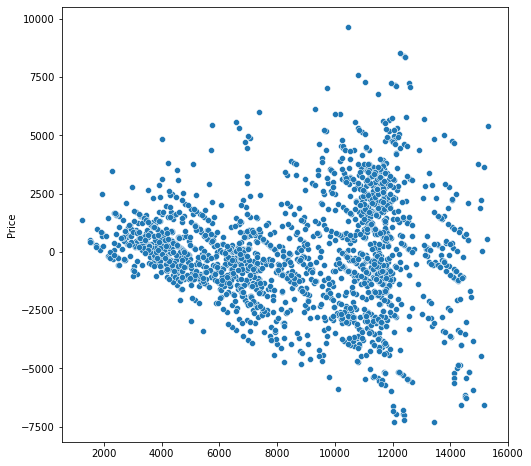

MSE: 5223344.001244515
MAE: 1715.1032490811263
RMSE: 2285.463629385625
r2  :  0.6686943339778937
aR2 :  0.8097042016336284
{'VALUES': ['MSE', 'MAE', 'RMSE', 'r2', 'aR2'], 'lasso': [5219196.019972098, 1714.3923784126205, 2284.55597873462, 0.6689574316597193, 0.8097042016336284], 'ridge': [5218862.806287208, 1714.667779852251, 2284.4830501203564, 0.6689785666992216, 0.8097042016336284], 'random': [2980656.834051009, 1115.8581121865557, 1726.4578865558838, 0.8109432391676044, 0.8097042016336284], 'linear': [5223344.001244515, 1715.1032490811263, 2285.463629385625, 0.6686943339778937, 0.8097042016336284]}


In [63]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


modelDict = {'lasso': Lasso(),
            'ridge' : Ridge(),
             'random':RandomForestRegressor(),
             'linear':LinearRegression()
            }

modelDictWithDetails = {'VALUES':['MSE','MAE','RMSE','r2','aR2'],
                        'lasso': [],
                        'ridge' : [],
                        'random':[],
                        'linear':[]}

k=1
for key, value in modelDict.items():

    model=value
    print()
    print()
    print(model)
    print()

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred
    
    plt.figure(figsize=(8,8))
    scatter_color = 'red'
    sns.scatterplot(y_test,y_pred,color=scatter_color)
    plt.xlabel("Test Truth Data")
    plt.ylabel("Test Predicted Data")
    plt.show()
    print()
    print()
    residuals = y_test-y_pred
    residuals = residuals.astype(float)

    plt.figure(figsize=(8,8))
    
    sns.kdeplot(residuals)
    
    plt.show()
    print()
    plt.figure(figsize=(8,8))
    sns.scatterplot(y_pred,residuals)
    plt.show()

    
    '''Preformance Metrix'''
    import numpy as np
    from sklearn import metrics
    from sklearn.metrics import mean_squared_error, mean_absolute_error

    MSE = metrics.mean_squared_error(y_test,y_pred)
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

    print('MSE:',MSE)
    print('MAE:',MAE)
    print('RMSE:',RMSE)
    


    ## R Square and Adjusted R Square
    from sklearn.metrics import r2_score
    r2 = metrics.r2_score(y_test,y_pred)

    ## Adjusted R square
    #display adjusted R-squared

    aR2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

    modelDictWithDetails[key].append(MSE)
    modelDictWithDetails[key].append(MAE)
    modelDictWithDetails[key].append(RMSE)
    modelDictWithDetails[key].append(r2)
    modelDictWithDetails[key].append(aR2)

    
    print('r2  : ',r2)
    print('aR2 : ', aR2)
    r2 = 0
    aR2 = 0

    
print(modelDictWithDetails)



In [64]:

models_value=pd.DataFrame(modelDictWithDetails)
models_value


,VALUES,lasso,ridge,random,linear
0,MSE,5.219196e+06,5.218863e+06,2.980657e+06,5.223344e+06
1,MAE,1.714392e+03,1.714668e+03,1.115858e+03,1.715103e+03
2,RMSE,2.284556e+03,2.284483e+03,1.726458e+03,2.285464e+03
3,r2,6.689574e-01,6.689786e-01,8.109432e-01,6.686943e-01
4,aR2,8.097042e-01,8.097042e-01,8.097042e-01,8.097042e-01


In [65]:
import pickle
file = open('flight_rf1.pk2','wb')
pickle.dump(modelRamdom,file)

In [66]:
model = open('flight_rf1.pk2','rb')
modelRamdomModel = pickle.load(model)

In [67]:
modelRamdomModel.predict(X_test[20].reshape(1,-1))

array([7780.1225])

In [7]:
# Create an empty dictionary
my_dict = {}

# List of keys and values to update the dictionary
keys = ['key1', 'key2', 'key3']
values = [10, 20, 30]

for i in range(len(keys)):
    if keys[i] in my_dict:
        my_dict[keys[i]].append(values[i])
    else:
        my_dict[keys[i]] = values[i]


        
        
print(my_dict)

list(my_dict.keys())[0]

{'key1': 10, 'key2': 20, 'key3': 30}


'key1'

In [ ]:
# Create an empty dictionary
my_dict = {}

# List of keys and values to update the dictionary
keys = ['key1', 'key2', 'key3']
values = [10, 20, 30]

for i in range(len(keys)):
    if keys[i] in my_dict:
        my_dict[i].append(values[i])
    else:
        my_dict[i] = values

        
        
print(my_dict)

list(my_dict.keys())[0]